In [1]:
import numpy as np
import matplotlib
# Monkey-patch for Matplotlib 3.6.1 compatibility with matplotlib-inline
if not hasattr(matplotlib.RcParams, '_get'):
    matplotlib.RcParams._get = lambda self, key: self.get(key)

import matplotlib.pyplot as plt
%matplotlib inline 

# Now import your project modules
import os
import sys
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

from src.utils.visualization import plot_scenario

In [14]:
# ## 1. Load Processed Data
# Let's load one of the `.npz` files generated by the parser.

# %%
# Update this path to a file you have actually generated
processed_base  = "/mnt/d/waymo_datasets/Deep-Flow_Dataset/processed_npz/training"

# 2. Pick any scenario (Example: folder '00', file 'scenario_00a...')
# You can use glob to find a valid file easily
import glob
sample_files = glob.glob(os.path.join(processed_base, "*", "*.npz"))
data_path = sample_files[8]

print(f"Loading: {data_path}")
data = np.load(data_path)

# %% [markdown]
# ## 2. Data Shape Verification
# Let's verify that the tensors match our architectural specifications.

# %%
print(f"Agent Tensor: {data['agents'].shape}")      # Expected: (Batch, 32, 91, 10)
print(f"Agent Mask:   {data['agent_mask'].shape}") # Expected: (Batch, 32, 91)
print(f"Agent Types:  {data['object_types'].shape}") # Expected: (Batch, 32)
print(f"Map Tensor:   {data['map'].shape}")        # Expected: (Batch, 256, 20, 7)
print(f"Map Mask:     {data['map_mask'].shape}")   # Expected: (Batch, 256)

Loading: /mnt/d/waymo_datasets/Deep-Flow_Dataset/processed_npz/training/10/10017bfda8ab7ae7.npz
Agent Tensor: (32, 91, 10)
Agent Mask:   (32, 91)
Agent Types:  (32,)
Map Tensor:   (256, 20, 7)
Map Mask:     (256,)


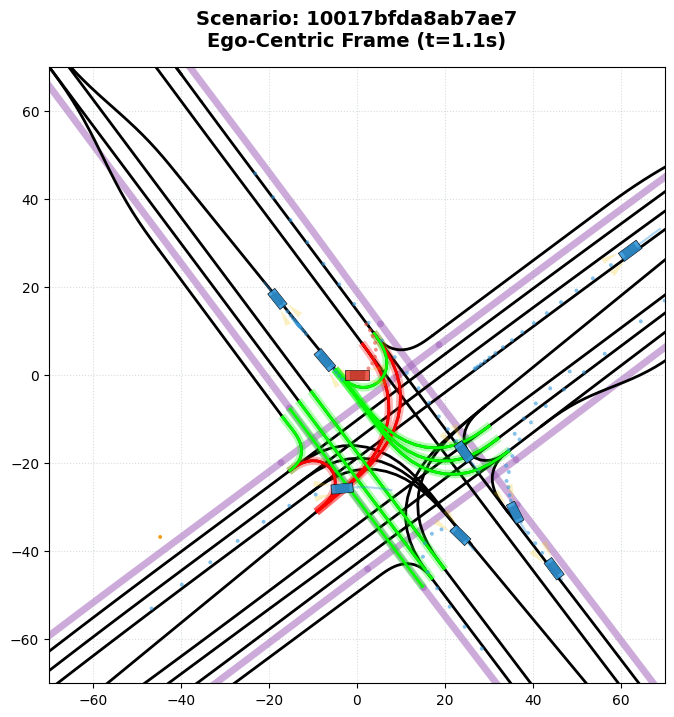

Scenario 10017bfda8ab7ae7 Breakdown:
 - Empty/Unknown: 22
 - Vehicles: 9
 - Pedestrians: 1


In [17]:
# ## 3. Visualizing a Scenario
# We will pick a scenario and plot it. 
# - **Red Arrow:** Ego Vehicle (at t=10)
# - **Blue/Green/Orange Lines:** Neighbors (Vehicles/Cyclists/Pedestrians)
# - **Solid Black Lines:** Road Edges
# - **Dashed Grey Lines:** Lane Centers
# - **Thick Red/Green/Yellow Lines:** Traffic Light Influence

# %%

fig, ax = plt.subplots(figsize=(8, 8))
plot_scenario(data, ax=ax, show_future=True)

# Save the figure as pdf if needed
plt.savefig("../results/scenario_visualization.pdf", bbox_inches='tight')

plt.show()

# %% [markdown]
# ## 4. Inspecting Agent Types
# Let's see what kind of agents are in this specific scenario.
# (1: Vehicle, 2: Pedestrian, 3: Cyclist)

# %%
unique_types, counts = np.unique(data['object_types'], return_counts=True)
type_map = {1: "Vehicles", 2: "Pedestrians", 3: "Cyclists", 0: "Empty/Unknown"}

print(f"Scenario {data['scenario_id']} Breakdown:")
for t, c in zip(unique_types, counts):
    print(f" - {type_map.get(t, 'Other')}: {c}")